In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [6]:
# Drop 'loan_id' column
df.drop("loan_id", axis=1, inplace=True)


In [7]:
# Display first few rows
print(df.head())

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loa

In [8]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB
None


In [9]:
# Display statistical summary
print(df.describe())

       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637

In [10]:
# Encode categorical variables
df["education"] = df["education"].str.strip().map({"Graduate": 1, "Not Graduate": 0})
df["self_employed"] = df["self_employed"].str.strip().map({"Yes": 1, "No": 0})
df["loan_status"] = df["loan_status"].str.strip().map({"Approved": 1, "Rejected": 0})

In [11]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['int64', 'object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64']).columns.tolist()

In [12]:
# Visualize distributions of numerical features
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="#a9a799", edgecolor='black')
    plt.title(f'Distribution of {col}', color="#4e4c39")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [13]:

# Visualize regression lines between 'price' and other variables if applicable
# (Assuming 'price' is a column in the dataset; adjust as needed)

# Compute correlation matrix
corr_matrix = df.corr()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Print the results
print("Logistic Regression Classification Report:\n", logreg_report)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Logistic Regression Confusion Matrix:
 [[275  43]
 [ 38 498]]


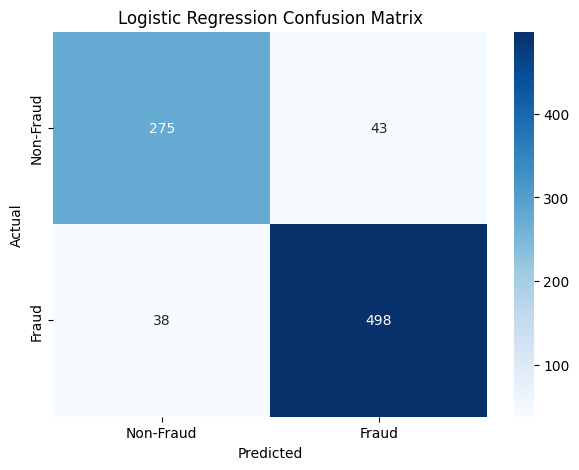

In [30]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(logreg_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for the test set
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_prob_logreg)

print(f"Log Loss for Logistic Regression: {logloss}")


Log Loss for Logistic Regression: 0.22651308705553408


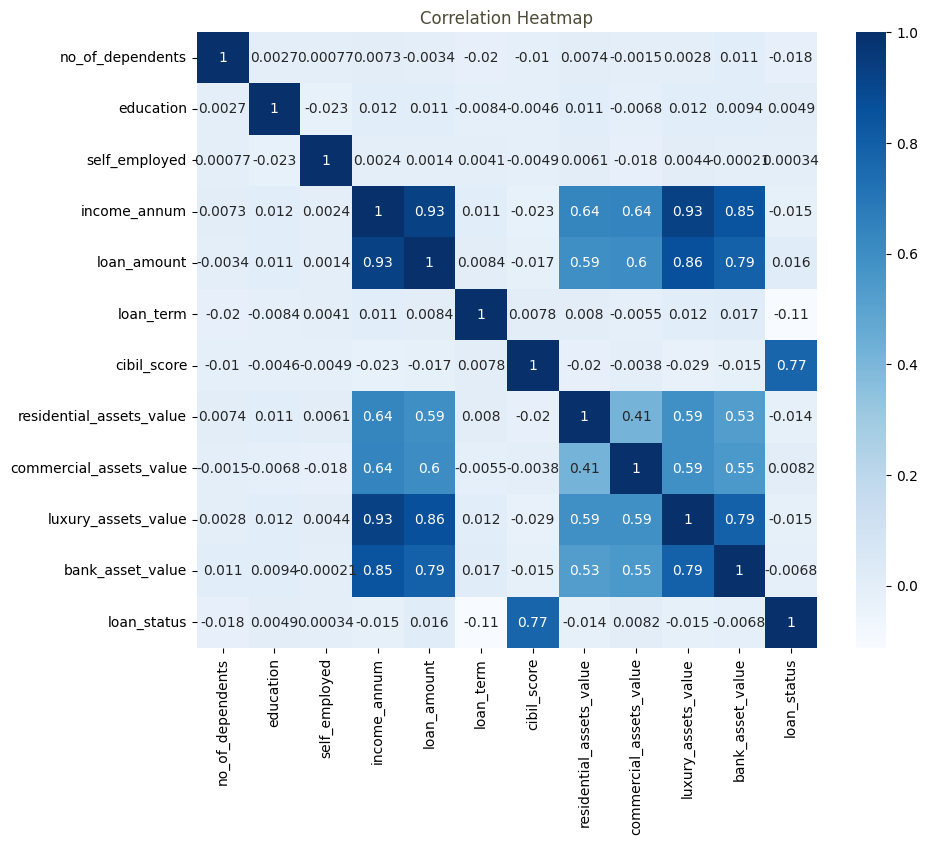

In [14]:
# Visualize heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap", color="#4e4c39")
plt.show()

In [15]:
# Split data into features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Identify numerical columns (int64 and float64)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove("loan_status")  # exclude target column

print("Numerical columns to scale:", num_cols)

# Scale numerical features if any
if num_cols:
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
else:
    print("No numerical columns to scale.")


Numerical columns to scale: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [19]:

# Initialize and train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:

# Make predictions
y_pred = dt_model.predict(X_test)

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.98


In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

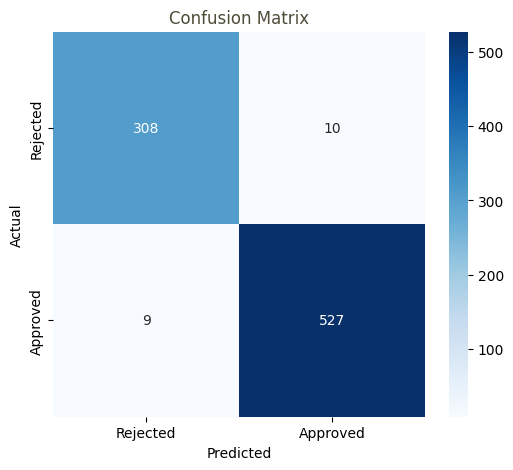

In [23]:
# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.title("Confusion Matrix", color="#4e4c39")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# Identify numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [25]:
# Scale numerical features if any
if len(num_cols) > 0:
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
else:
    print("No numerical columns to scale.")


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = dt_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.977751756440281
Confusion Matrix:
 [[308  10]
 [  9 527]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



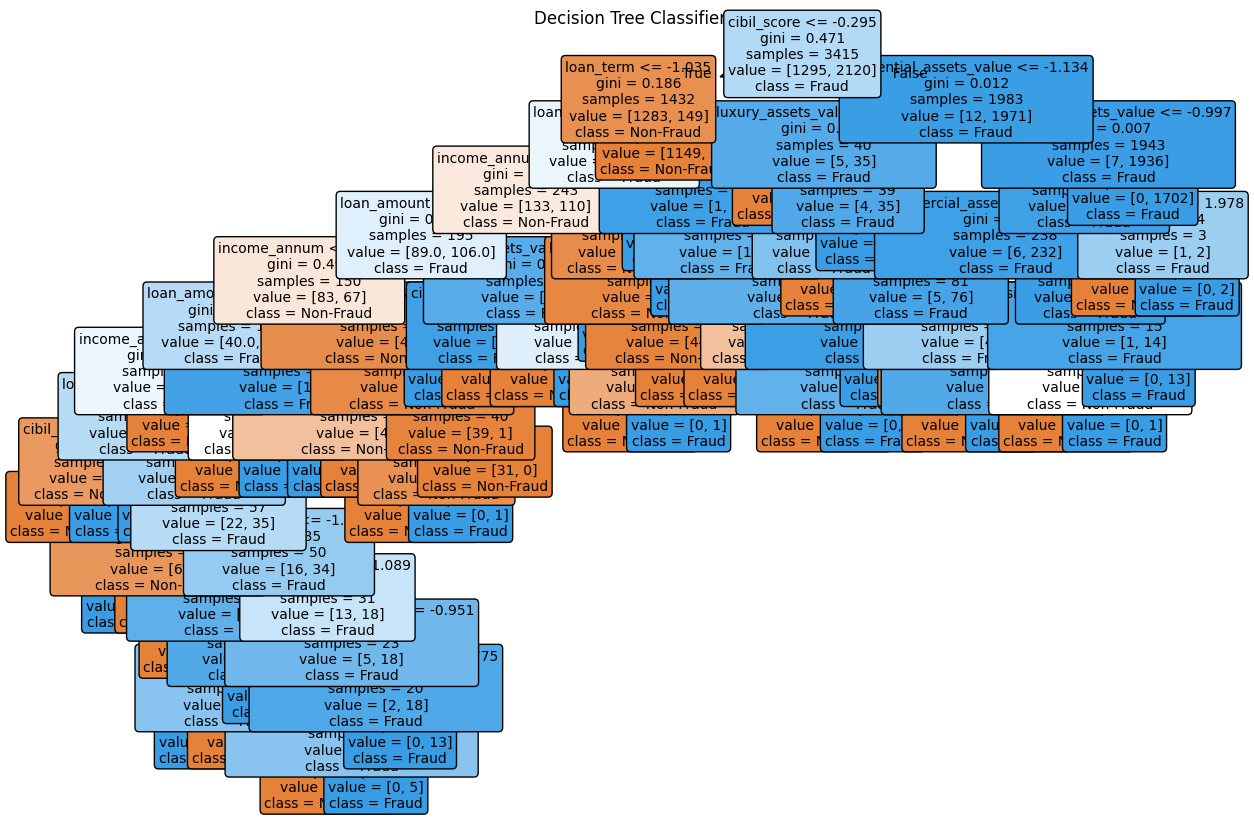

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Non-Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', probability=True)  # probability=True is needed for predict_proba

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the evaluation metrics
print(f"Accuracy of SVM: {accuracy_svm}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)


Accuracy of SVM: 0.9168618266978923
Confusion Matrix:
 [[288  30]
 [ 41 495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       318
           1       0.94      0.92      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

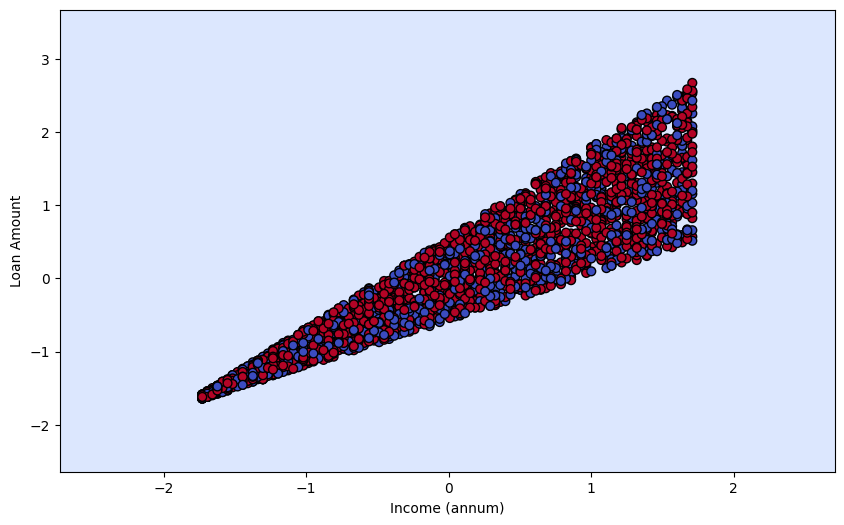

In [36]:
# Select the correct 2D features based on your actual dataset columns
X = df[['income_annum', 'loan_amount']]
y = df['loan_status']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the selected features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Create a meshgrid for plotting
import numpy as np
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(
    np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 500),
    np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 500)
)

# Predict class labels for each point in the meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot the actual data points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=40, edgecolor='k', cmap='coolwarm')

# Add labels and title
plt.xlabel('Income (annum)')
plt.ylabel('Loan Amount')
plt.title
